In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

<b><font size="6" color="red">ch11. 데이터프레임과 시리즈(pandas)</font></b>
- pip install pandas
# 1절 판다스 패키지
- 데이터 분석을 위해 반드시 알아야 할 패키지. 넘파이를 기반으로 하며,
  다른 많은 라이브러리와 잘 통합되도록 설계
- 2차원 구조를 갖는 데이터프레임, 1차원 구조를 갖는 시리즈를 제공

- 판다스 장점 : 데이터프레임생성, 파일io, 레이블링, 부분데이터 추출, 크기변경(행이나 열 삽입, 삭제), 데이터 분할, 병합, 데이터구조변경, 결측치 처리
- https://pypi.python.org/pypi/pandas(package index)
- http://pandas.pydata.org/pandas-docs/stable/api.html(API reference)

In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [3]:
data = pd.read_json("data/ch09_member1.json",
                    encoding='cp949') # 기본 encoding은 utf-8 
display(data)
print(type(data))

,name,age,email,address
0,홍길동,30,hg@hong.com,서울
1,박길동,20,pg@hong.com,부산
2,신길동,25,sg@hong.com,대전


<class 'pandas.core.frame.DataFrame'>


In [4]:
member4 = pd.read_csv('data/ch09_member4.csv') # 기본 encoding=utf-8
member4

,name,age,email,address
0,신길동,30,sg@hong.com,서울
1,홍길동,20,ho@hong.com,수원
2,마길동,25,ma@hong.com,안양


In [5]:
member1 = pd.read_csv('data/ch09_member1.csv',
                     header=None,
                     names=['name', 'age', 'email', 'address'])
member1

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


# 2절 데이터프레임 만들기
## 2.1 딕셔너리 리스트를 이용해서 데이터프레임 만들기

In [6]:
d = [{'kor':100, 'mat':95}, {'kor':90, 'mat':99}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [7]:
df.to_dict() # 데이터프레임을 딕셔너리로

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [8]:
df.to_numpy() # 데이터프레임을 넘파이배열
df.values   # 데이터프레임을 넘파이배열

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [9]:
df.dtypes # 열의 타입

kor    int64
mat    int64
dtype: object

In [10]:
df.info() # ★

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [11]:
df['kor'].dtype

dtype('int64')

In [12]:
# 타입변경(열마다)
import numpy as np
df['kor'].astype(np.float64)
df['kor'] = df['kor'].astype('float64') # kor열의 타입을 float64로

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     2 non-null      float64
 1   mat     2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


In [14]:
d = [{'kor':100.0, 'mat':95}, {'kor':90, 'mat':99}, {'kor':92, 'eng':99}]
df = pd.DataFrame(data=d)
df

,kor,mat,eng
0,100.0,95.0,NaN
1,90.0,99.0,NaN
2,92.0,NaN,99.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      float64
 1   mat     2 non-null      float64
 2   eng     1 non-null      float64
dtypes: float64(3)
memory usage: 200.0 bytes


In [16]:
type(np.nan) # np.nan결측치

float

In [17]:
df['kor'] = df['kor'].astype('int32')
df

,kor,mat,eng
0,100,95.0,NaN
1,90,99.0,NaN
2,92,NaN,99.0


In [18]:
# 결측치는 int로 형변환 불가(결측치를 대체값으로 치환 후 변환)
# df['mat'] = df['mat'].astype('int32')

## 2.2 리스트를 이용해서 데이터프레임 만들기

In [19]:
kor = [100,90,95,90,65]
mat = [99,100,95,98,94]
df = pd.DataFrame({'kor':kor, 'mat':mat})
df.head(2) # 상위 2행만

,kor,mat
0,100,99
1,90,100


In [20]:
np.c_[kor, mat]

array([[100,  99],
       [ 90, 100],
       [ 95,  95],
       [ 90,  98],
       [ 65,  94]])

In [21]:
df = pd.DataFrame(data=np.c_[kor, mat], columns=['국어','수학'])
df

,국어,수학
0,100,99
1,90,100
2,95,95
3,90,98
4,65,94


In [22]:
df.shape

(5, 2)

In [23]:
l = [['트렌드 코리아2026', '김난도', 18000, 10],
     ['사탄탱고', '라슬로', 17820, 10],
     ['미술관 여행자', '카미유주노', 29700, 10]]
df = pd.DataFrame(l, columns=['책이름','저자','가격','할인율'])
df

,책이름,저자,가격,할인율
0,트렌드 코리아2026,김난도,18000,10
1,사탄탱고,라슬로,17820,10
2,미술관 여행자,카미유주노,29700,10


In [24]:
# %ls : ipython 매직명령어
# !dir : 쉘명령어

In [25]:
%ls "C:\ai\downloads\shareData\상가정보"

지정된 파일을 찾을 수 없습니다.


In [26]:
df = pd.read_csv(r'C:\ai\downloads\shareData\상가정보\소상공인시장진흥공단_상가(상권)정보_서울_202503.csv',
                 encoding='utf-8', sep=',', # 기본값 생략가능
                 nrows=70) # 처음 70행만 가져오기
df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\ai\\downloads\\shareData\\상가정보\\소상공인시장진흥공단_상가(상권)정보_서울_202503.csv'

In [ ]:
df.head(1) # 상위 

In [ ]:
# 판다스 디스플레이 옵션
pd.options.display.max_columns = 39 # 39열까지 display가능. 기본값 20
pd.options.display.max_rows = 70    # 70행까지 display가능. 기본값 60

In [ ]:
df.head(1)

In [ ]:
df.head(1).T

## 2.3 read_csv

In [ ]:
# help(pd.read_csv)
# pd.read_csv() # 함수 안에서 shift+tab+tab
pd.read_csv?

In [ ]:
# (1) csv 파일 불러오기(기본값)
member = pd.read_csv('data/ch11_member.csv',
                     #, encoding='utf-8', sep=',', comment주석처리x
                    )
member.info()

In [ ]:
# 문자형로 읽어들인 Birth를 datetime형으로
# 형변환 : astype('int64'), astype('datetime64' : 비추)
#         to_datetime()함수
# member['Birth'].astype('datetime64') 비추
member['Birth'] = pd.to_datetime(member['Birth'])
member.head(1)

In [ ]:
member.info()

In [ ]:
member['Age'] = member['Age'].astype(np.int16)
member.dtypes

In [ ]:
# (2) 특정행을 제외하고 csv 파일 읽어오기
member = pd.read_csv('data/ch11_membercp949.csv',
                     encoding='cp949',
                     skiprows=[1,6]) # 1,6번째 행 제외하고 읽어오기(시작은 1부터)
member

In [ ]:
# (3) 상위몇행만 sep문자는 ,아닌 csv파일 읽어오기
member = pd.read_csv('data/ch11_membersep.csv', 
                     nrows=5, # 상위 5행만
                     sep='|')
member

In [ ]:
# (4) 주석(#)제외, datetime형 필드를 지정하여 csv 파일 읽어오기
member = pd.read_csv('data/ch11_membertab.csv',
                     sep='\t',              # 구분자 설정
                     comment='#',           # 주석제외
                     parse_dates=['Birth']) # datetime64형으로 읽어올 필드지정
member.info()

## 2.4 패키지에서 가져오기 : iris 데이터
- iris 가져오기 방법1 : sklearn(머신러닝 패키지)
- iris 가져오기 방법2 : statsmodels (R데이터)
- iris 가져오기 방법3 : seaborn(시각화패키지)
### 2.4.1 iris 방법1 : sklearn
- sklearn.datasets 모듈 데이터(iris)를 데이터 프레임으로 변환

In [ ]:
from sklearn import datasets #머신러닝을 공부하기 위한 학습 데이터셋 제공
# sklearn 패키지에서 제공되는 데이터셋은 딕셔너리형식으로 제공
iris = datasets.load_iris()
print(type(iris)) # Bunch타입(딕셔너리를 상속받은 타입) 딕셔너리처럼 동작
# print(iris.DESCR) # iris 데이터셋의 설명
print(iris.keys())

In [ ]:
iris.data # 독립변수
iris['data'][:3] # 상위 3행

In [ ]:
# 데이터프레임의 열이름(비추)
iris.feature_names

In [ ]:
# 데이터프레임의 열이름(강추)
[col[:-5].replace(' ', '_') for col in iris.feature_names]

In [ ]:
iris.target # ML/DL 학습시 타겟변수(종속변수)
iris['target']

In [ ]:
iris.target_names

In [ ]:
iris.target_names[iris.target] # 데이터프레임에 쓸 타겟변수(가장 오른쪽 열)

In [ ]:
# 독립변수
data = iris.data
# 종속변수
target = iris.target_names[iris.target].reshape(-1,1)
print(data[:3], target[:3])

In [ ]:
print('독립변수 shape :', data.shape)
print('타겟변수 shape :', target.shape)

In [ ]:
# 1. 독립변수와 종속변수를 stack한 후 데이터프레임으로
df =pd.DataFrame(np.hstack((data, target)),
                 columns=iris.feature_names + ['species'])
df.head(1)

In [ ]:
# df.sepal length (cm)
# df['sepal length (cm)']
df.columns = [col[:-5].replace(' ','_') for col in iris.feature_names] + ['species']
df.head(1)

In [ ]:
df.sepal_length

In [ ]:
# 2. 독립변수, 종속변수를 따로 데이터프레임으로 생성 -> 두 데이터프레임을 연결

In [ ]:
X =pd.DataFrame(iris.data,columns=[col[:-5].replace(' ','_') for col in iris.feature_names])
X.head(1)

In [ ]:
y = pd.DataFrame(iris.target_names[iris.target], columns=['species'])
y.head(1)

In [ ]:
print('X의 shape :', X.shape)
print('y의 shape :', y.shape)
print('X의 index :', X.index)
print('y의 index :', y.index)

In [ ]:
iris_df = pd.concat( [X, y], axis=1 ) # 두개의 데이터프레임을 열로 연결
iris_df.info()

### 2.4.2 iris 방법2 : statsmodels

In [ ]:
# R패키지의 기본 데이터 가져오기
from statsmodels.api import datasets
iris_dataset = datasets.get_rdataset('iris',
                                     package='datasets',
                                     cache=True) # 한번 다운로드한 데이터를 pc에 저장
iris_dataset

In [ ]:
iris = iris_dataset.data
iris.head() # 상위5행

In [ ]:
iris.columns = [col.replace('.','_').lower() for col in iris.columns]
iris.head(1)

### 2.3.3 iris 방법3 : seaborn

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

In [ ]:
# 데이터프레임을 파일로 출력(4k)
iris.to_csv('data/ch11_iris.csv',
            sep=',',encoding='utf-8', # 기본값
            index=False) # 행이름이 생략되서 출력

In [ ]:
iris.to_csv('data/ch11_iris.csv.gz', # 889B
            index=False,
            compression='infer') # 파일 확장자에 맞게 압축

In [ ]:
import pandas as pd
# read_iris = pd.read_csv('data/ch11_iris.csv')
read_iris = pd.read_csv('data/ch11_iris.csv.gz', compression='infer')
read_iris.head(1)

# 3절 이름(열, 행) 지정하기
## 3.1 열이름 지정하기

In [ ]:
member = pd.read_csv('data/ch11_member.csv',
                     comment='#',
                     parse_dates=['Birth'])
member.head(1)

In [ ]:
member.columns = ['이름','나이','메일','주소','생일']
member.head(1)

## 3.2 행이름 지정

In [ ]:
member.index

In [ ]:
member.index = range(11,16)
member

In [ ]:
member.index = ['동','서','남','북','중']
member

In [ ]:
member['이름']

In [ ]:
# member['이름']['동'] 비추
member.loc['동','이름'] # 행과 열이름으로 부분 데이터 조회: loc

In [ ]:
# index를 이름열로 (실행결과가 출력되서 나오면 return될뿐, member는 안 바뀜)
# member를 수정하려면 (1)할당 (2) inplace 매개변수에 True(기본값 False)
member1 = member.set_index('이름')
member1.head(1)

In [ ]:
member.set_index('이름',inplace=True)

In [ ]:
member

In [ ]:
member.index

In [ ]:
#인덱스를 컬럼으로 편입시키기
member.reset_index(inplace=True)

In [ ]:
member.index = [0, 1, 2, 0, 2]
member

In [ ]:
# 기존 index를 새로운 열에 편입시키지 않고 제거한 후, 새로운 숫자 index로 초기화
# member.index = range(len(member))
member = member.reset_index(drop=True)
member

In [ ]:
# datetime열에서 날짜 및 시간에 관련된 정보를 추출 : 시리즈.dt
member['생일'].dt.year

In [ ]:
member['생일'].dt.month

In [ ]:
member['생일'].dt.weekday # 0월, 1화, ... 5:토, 6:일

## 3.3 레벨이름 지정하기

In [ ]:
member

In [ ]:
print(member.columns)
print(member.columns.name)

In [ ]:
member.columns.name = '정보'
member

In [ ]:
member.columns = [['기본정보','기본정보','기본정보','추가정보','추가정보'],
                  ['이름','나이','메일','주소','생일']]
member.columns.names = ['대분류','소분류']
member

In [ ]:
member.index = [['좌우','좌우','상하','상하','상하'],
                ['동','서','남','북','중']]
member.index.names = ['레벨1','레벨2']
member

In [ ]:
member.loc[('상하','중'),'기본정보']

In [ ]:
member.loc[('상하','북'),('기본정보','이름')]

In [ ]:
member.loc['상하','기본정보']

# 4절 부분데이터 조회

In [ ]:
member = pd.read_csv('data/ch11_member.csv',
                     comment='#',
                     parse_dates=['Birth'])
member

## 4.1 단일 열 조회

In [ ]:
member['Name']
member.Name

In [ ]:
# member[0] # 행이름으로 []로 조회할 경우 에러

In [ ]:
member[['Name','Address']]

## 4.2 loc을 이용한 조회
- df.loc[행이름, 열이름] : 행이름, 열이름으로 조회
    * 행이름과 열이름자리에 슬라이싱 from:to : from부터 to까지(to 포함)
    * 행이름과 열이름자리에 리스트

In [ ]:
member.loc[0:2]
member.loc[0:2,]
member.loc[0:2, :] 
member.loc[0:2, ...] # 모든열을 다 출력할 경우 열 생략가능

In [ ]:
member.index = ['동','서','남','북','중']
member.loc['동':'남']

In [ ]:
member.loc['동':'남', 'Name':'Address'] # 동~남행, Name~Address열까지

In [ ]:
# 동,남행, Name,Email,Address열
member.loc[['동','남'], ['Name','Email','Address']]

In [ ]:
member.loc[:,'Name']

## 4.3 iloc을 이용한 조회
- df.iloc[행순번, 열순번] : 행이름, 열이름으로 조회
    * 행순번과 열순번자리에 슬라이싱 from:to:by : from부터 to 앞까지 by씩 (to 미포함)
    * 행순번과 열순번자리에 리스트

In [ ]:
member

In [ ]:
# 동행(0)부터 남행(2)까지 모든 열
member.iloc[0:3]
member.iloc[0:3,]
member.iloc[0:3, :]
member.iloc[0:3, ...]

In [ ]:
# 0번째 행
type(member.iloc[0])

In [ ]:
# 동행부터 남행까지 Name(0)부터 Address(3)열까지
member.iloc[0:3, 0:4]
member.iloc[0:3, 0:-1]

In [ ]:
# 짝수번째 행의 마지막 열을 제외하고 출력
member.iloc[::2, :-1]

In [ ]:
# 마지막행부터 처음행까지 거꾸로 출력
member.iloc[::-1]

In [ ]:
# 동(0)행과 남(2)행, Name(0)열, Email(2), Address(3)열
member.iloc[[0,2], [0,2,3]]

In [ ]:
# Name(0)열
member.iloc[:,0]
member.iloc[...,0]

## 4.4 조건으로 조회하기

In [ ]:
member

In [ ]:
member['Name']=='홍길남'

In [ ]:
# Name이 홍길남인 행을 모두
member[member['Name']=='홍길남']
member.loc[member['Name']=='홍길남']
member.loc[ [False, False, True, False, False] ]

In [ ]:
# Name이 홍길남의 이름과 나이 Email
member.loc[member['Name']=='홍길남', 'Name':'Email']

In [ ]:
# Name이 홍길남의 이름과 Email
member.loc[member['Name']=='홍길남', ['Name','Email']]

In [ ]:
# 23세 이상 데이터 조회(모든열)
member.loc[member['Age']>=23]

In [ ]:
# 23세 이상의 Name, Age, email
member.loc[member['Age']>=23, 'Name':'Email']

In [ ]:
# 23세 이상의 Name, Age, Address
member.loc[member['Age']>=23, ['Name','Age','Address']]

In [ ]:
# ~ : 반대
member[~(member["Age"]>=23)]

In [ ]:
address = '서울시 관악구'
print('서울시로 시작하는지 여부 :', address.startswith('서울시'))
print('중구가 포함되어 있는지 여부 :', address.find('중구')!=-1)

In [ ]:
# member['Address'].startswith('서울시')

※ 시리즈에 문자함수를 쓰기 위해 참조 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [ ]:
# 서울시로 시작하는 데이터
member['Address'].str.startswith('서울시')

In [ ]:
member[member['Address'].str.startswith('서울시')]

In [ ]:
# Address에 중구를 포함하는 데이터(방법1)
member['Address'].str.find('중구')!=-1

In [ ]:
# Address에 중구를 포함하는 데이터(방법2)
member[member['Address'].str.contains('중구')]

In [ ]:
# 시리즈.isin([])
# 이름이 홍길동이거나 홍길남인 데이터
member.loc[member['Name'].isin(['홍길동','홍길남'])]
member[member['Name'].isin(['홍길동','홍길남'])]

In [ ]:
# 이름이 홍길동이거나 홍길남이 데이터의 이름, 주소, 생일
member.loc[member['Name'].isin(['홍길동','홍길남']), ['Name','Address','Birth']]

In [ ]:
# 2000년 이전에 태어난 데이터
member[member['Birth'].dt.year < 2000]

In [ ]:
# 조건 연산자를 이용해서 추출(조건2개)
import numpy as np
import pandas as pd
data = pd.DataFrame({'eng':[np.nan, 80, np.nan, 85],
                     'kor':[100, 80, 60, np.nan]})
display(data)
# 영어 80이상이고 국어 80이상인 데이터 추출
data[(data['eng']>=80) & (data['kor']>=80)]

In [ ]:
# 결측치 확인 방법1
data.info()

In [ ]:
# 결측치 확인 방법2
data.isna() # 결측치 여부

In [ ]:
True + True + False

In [ ]:
data.isna().sum() # 각 열의 결측치 갯수

※ 데이터 프레임의 부분 데이터 조회방법
- df[열이름] : 특정열 조회
- df[조건] : 조건에 맞는 모든 행 조회
- df.loc[행이름, 열이름]
    - 행이름, 열이름 자리에 슬라이싱, 리스트
    - 열이름 생략시 모든 열
    - 행이름 자리에 조건
- df.iloc[행순번, 열순번]
    - 행순번, 열순번 자리에 슬라이싱, 리스트
    - 열순번 생략시 모든 열

- 데이터프레임 조건 추출 quiz

In [ ]:
# iris 가져오기(sklearn, statsmodels, seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')
iris

In [ ]:
# 1. sepal_length 열만 출력
iris[['sepal_length']]
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[0:10,'sepal_length':'petal_width']
iris.iloc[0:11:,:-1]
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10,['sepal_length','petal_length']]
iris.iloc[3:11,[0,2]]
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[0:100:50,:]
iris.iloc[0:101:50,:]
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[0:125:25, ['sepal_length','petal_length']]
iris.iloc[0:126:25, [0,2]]
# 6. species가 versicolor인 데이터의 모든 열
iris.loc[iris['species']=='versicolor']
# 7. species가 setosa인 데이터 최초 5개 행만 출력
a=iris.loc[iris['species']=='setosa']
a.head(5)
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris.loc[iris['sepal_length']>=7.2, ['sepal_length','petal_length']]
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris['sepal_length']>=7.2, ['sepal_length','petal_length']]
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[(iris['species']=='versicolor') & (iris['sepal_length']>6.5)]

In [ ]:
# 1. sepal_length 열만 출력
iris['sepal_length']

In [ ]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[0:10, 'sepal_length':'petal_width']
df.loc[0:10, df.columns[:-1]] # 메일 받은 내용
iris.iloc[0:11, :-1]

In [ ]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10, ['sepal_length','petal_length']]
iris.iloc[3:11, [0,2]]

In [ ]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[0:100:50]
iris.loc[[0, 50,100]]
iris.iloc[0:101:50]

In [ ]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[0:125:25, 'petal_length':'petal_width']
iris.iloc[0:126:25, 2:-1]

In [ ]:
# 6. species가 versicolor인 데이터의 모든 열
iris[iris['species']=='versicolor']

In [ ]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris['species']=='setosa'].head()
iris[iris['species']=='setosa'].iloc[:5]

In [ ]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris['sepal_length']>=6.5].head()
iris[iris['sepal_length']>=6.5].iloc[:5]

In [ ]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris['sepal_length']>=7.2, 'sepal_length':'petal_length']
iris[iris['sepal_length']>=7.2][['sepal_length','sepal_width','petal_length']]

In [ ]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[(iris['species']=='versicolor') & (iris['sepal_length']>6.5)]

In [ ]:
import numpy as np

In [ ]:
iris[np.logical_and(iris['species']=='versicolor',
               iris['sepal_length']>6.5)]

# 5절 데이터 삭제 및 추가
## 5.1 데이터프레임의 요소삭제
- df.drop(삭제할열이름이나 행이름,axis)
    * axis=0일때는 행삭제, axis=1일때는 열삭제

In [ ]:
member

In [ ]:
# 1) 단일 행 삭제
member.drop('중') # axis=0(기본값) : 해당 행 삭제 
# 삭제한 결과를 member 적용 (1)할당 member = member.drop('중', axis=0)
#                        (2)member.drop('중', axis=0, inplace=True)

In [ ]:
# 2) 복수 행 삭제
member.drop(['동','서','남'])

In [ ]:
# 3) 열 삭제
member.drop(['Name', 'Email'], axis=1)

## 5.2 데이터프레임의 요소 추가

In [ ]:
# 1) 열 추가
member['nickname'] = '빼곰이'
member

In [ ]:
# 2) 리스트를 이용한 열 추가
member['favorite_no'] = [3,2,7,None,12]
member

In [ ]:
# 3) favorite_num열에 결측치를 할당 후 원하는 데이터
member['favorite_num'] = np.nan
member.iloc[::2, -1] = 7
member.head(1)

In [ ]:
member.drop(['Email', 'Birth','favorite_no','favorite_num'], axis=1, inplace=True)
member

In [ ]:
# 4) 딕셔너리로 행 추가
new_member = pd.DataFrame([
    {'Name':'홍길쑥','Age':30,'Address':'서울','nickname':'빼곰이'}
  ])
pd.concat( [member, new_member] ).reset_index(drop=True) # 두 데이터 프레임 연결
member

# 6절 병합과 연결
## merge()를 이용한 데이터프레임 병합

In [ ]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                    'c1':[1,2,3,4]})
df2 = pd.DataFrame({'key':['a','b','c','f'],
                    'c2':[10,20,30,40]})
df1.merge(df2) # how='inner' 기본값: 내부조인(양쪽이 다 일치하는 데이터만 병합)

In [ ]:
df1.merge(df2, how='left') # 왼쪽의 df1 데이터는 모두 남기고 오른쪽 df2가 매칭되도록

In [ ]:
df1.merge(df2, how='right') # 오른쪽의 df2 데이터는 모두 남기고 왼쪽 df1가 매칭되도록

In [ ]:
df1.merge(df2, how='outer') # 양쪽 데이터 df1, df2 데이터 모두 남김

In [ ]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                    'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','f'],
                    'c2':[10,20,30,40]})
df3.merge(df4, left_on='key3', right_on='key4', how='inner')

## 6.2 concat()을 이용한 데이터프레임 연결
- pd.concat( [df1, df2, df3..], axis)
    * axis=0 (기본값) : 위아래로 연결
    * axis=1 : 좌우로 연결

In [ ]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                    'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','f'],
                    'c2':[10,20,30,40]})
pd.concat([df3, df4],axis=1) # 좌우 연결

In [ ]:
df3 = pd.DataFrame({'key':['a','b','c','d'],
                    'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key':['a','b','c','f'],
                    'c1':[10,20,30,40]})
pd.concat([df3, df4]).reset_index(drop=True)

# 7절 정렬(행이름, 열이름, 값에 의한 정렬)
- df.sort_index(axis) : 행 또는 열이름으로 정렬
- df.sort_values(by=[정렬기준이 될 열이름], ascending=T/F) : 특정 열 값에 의한 정렬

In [ ]:
member = pd.read_csv('data/ch11_member.csv',comment='#')
member.index = ['동', '서', '남', '북', '중']
member

## 7.1 행이름으로 정렬

In [ ]:
# ascending=True 오름차순(기본값) / ascending=False(내림차순)
member.sort_index(axis=0, inplace=True)
member

## 7.2 열이름으로 정렬

In [ ]:
member = member.sort_index(axis=1) # axis='columns'
member

## 7.3 값에 의한 정렬

In [ ]:
member.sort_values(by='Age') # Age기준으로 오름차순 정렬(ascending=True)

In [ ]:
member.sort_values(by='Age', ascending=False)

In [ ]:
# Age기준으로 오름차순, Age같으면 Email 기준 내림차순 정렬
member.loc[:, 'Age'] = [20,20,30,30,30]
member

In [ ]:
# Age 기준으로 오름차순, Age같으면 Email 기준 내림차순 정렬
member.sort_values(by=['Age','Email'], ascending=[False, True])

# 8절 기초 통계 분석
    - 판다스는 기초통계(데이터 요약), statsmodels:난이도 있는 통계
- count : Nan을 제외한 데이터 수
- min : 최소값
- max 
- sum
- cumsum : 누적합
- cumprod : 누적곱
- mean : 평균
- median : 중위수
- std : 표준편차
- var : 분산
- quantile : 분위수(0사분사위수=최소값, 1사분위수, 2사분위수(중위값), 3사분위수, 4사분위수=최대값)
    * 이상치 구하는 용도 : Q1-1.5*IQR ~ Q3+1.5*IQR 이외의 데이터는 이상치
- describe : 요약통계량
- corr : 상관관계(계수)
- rolling(n).mean() : n개씩 평균 출력 - 데이터 변동이 많을 때 추세(패턴)을 부드럽게 보고 싶을 때

In [1]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.tail(2)

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## 8.1 min, max, ...

In [2]:
iris.min() # 열별 최소값(axis=0)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [3]:
iris.median(axis=0, numeric_only=True) # iris에서 숫자필드만 중위수 계산

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [4]:
X = iris.loc[:, 'sepal_length':'petal_width']
#X = iris.iloc[:, :-1]
X.mean(axis='rows') # 열별평균 == 행들의 평균(axis=0 이나 axis='rows')

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [5]:
#X.mean(axis=1)
X.mean(axis='columns') # 행별 평균 == 행을 고정하고, 열들의 평균

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [6]:
import pandas as pd
df = pd.DataFrame(data=[1, 3, 4, 7, 10], columns=['value'])
# interpolation='nearest' : 정확한 구간의 값이 없을 경우 가까운 값
df['value'].quantile(q=[0,0.3,0.55,0.8,1], interpolation='nearest')

0.00     1
0.30     3
0.55     4
0.80     7
1.00    10
Name: value, dtype: int64

In [7]:
# interpolation='midpoint' : 정확한 구간의 값이 없을 경우 환산해서 출력
df['value'].quantile(q=[0,0.3,0.55,0.8,1], interpolation='midpoint')

0.00     1.0
0.30     3.5
0.55     5.5
0.80     8.5
1.00    10.0
Name: value, dtype: float64

In [8]:
X.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [9]:
qunt=X.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')
for idx, col in enumerate(qunt.columns):
    min = qunt.iloc[0, idx]
    Q1 = qunt.iloc[1,idx]
    Q3 = qunt.iloc[3,idx]
    max = qunt.iloc[4, idx]
    iqr = Q3 - Q1
    lower_outlier = Q1 - 1.5*iqr # 하한이상치 limit
    upper_outlier = Q3 + 1.5*iqr # 상한이상치 limit
    print(f"{idx}번째 : {col} :",end="")
    print('하한이상치 여부 : {}, 상한이상치 여부 : {}'.format(min<lower_outlier,
                                                         max>upper_outlier))

0번째 : sepal_length :하한이상치 여부 : False, 상한이상치 여부 : False
1번째 : sepal_width :하한이상치 여부 : True, 상한이상치 여부 : True
2번째 : petal_length :하한이상치 여부 : False, 상한이상치 여부 : False
3번째 : petal_width :하한이상치 여부 : False, 상한이상치 여부 : False


<Axes: >

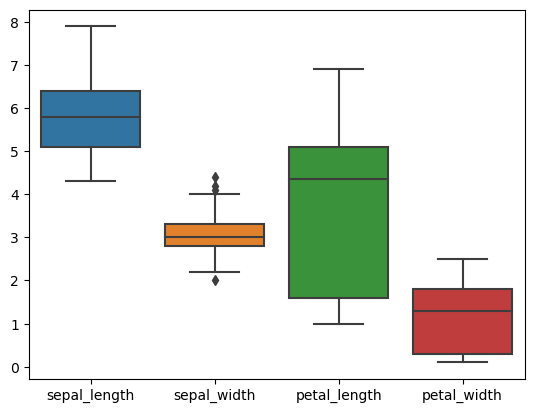

In [11]:
# 상자수염그림(박스플롯) - 시각화 교안 21page
import seaborn as sns
sns.boxplot(data=iris)

In [10]:
iris['sepal_length'].rolling(5).mean()[4:30] # 인접한 5개의 평균

4     4.86
5     4.92
6     4.86
7     4.92
8     4.88
9     4.86
10    4.86
11    4.90
12    4.86
13    4.84
14    5.02
15    5.08
16    5.20
17    5.26
18    5.54
19    5.40
20    5.34
21    5.28
22    5.18
23    5.06
24    5.00
25    4.92
26    4.90
27    5.02
28    5.04
29    5.02
Name: sepal_length, dtype: float64

## 8.2 요약통계량
- describe()

In [12]:
# 1) 기본 요약 통계량
iris.describe() # 기본값 : 숫자열에서의 요약통계량

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
iris['species'].describe()
iris.species.describe() # 문자열에서의 요약통계량 : 데이터갯수, 종류(unique), 최빈데이터(top), 최빈데이터갯수(freq)

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [14]:
# 2) describe()의 include와 exclude 매개변수
df = pd.DataFrame({'a':[1,2,3]*2,
                   'b':[2.1,4]*3,
                   'c':['aaa','aaa','bbb','ccc','ddd','eee'],
                   'd':[True,False]*3})
df

,a,b,c,d
0,1,2.1,aaa,True
1,2,4.0,aaa,False
2,3,2.1,bbb,True
3,1,4.0,ccc,False
4,2,2.1,ddd,True
5,3,4.0,eee,False


In [15]:
df.describe() # 숫자열만 기본 요약 통계량 출력

,a,b
count,6.000000,6.000000
mean,2.000000,3.050000
std,0.894427,1.040673
min,1.000000,2.100000
25%,1.250000,2.100000
50%,2.000000,3.050000
75%,2.750000,4.000000
max,3.000000,4.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [17]:
# include 매개변수를 통해서 요약통계량을 출력할 타입 지정
df.describe(include=['float64','bool','object'])

,b,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,3.050000,NaN,NaN
std,1.040673,NaN,NaN
min,2.100000,NaN,NaN
25%,2.100000,NaN,NaN
50%,3.050000,NaN,NaN
75%,4.000000,NaN,NaN


In [18]:
df.describe(include='all') # 모든 타입의 열의 요약 통계량 출력

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,5,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,2,3
mean,2.000000,3.050000,NaN,NaN
std,0.894427,1.040673,NaN,NaN
min,1.000000,2.100000,NaN,NaN
25%,1.250000,2.100000,NaN,NaN
50%,2.000000,3.050000,NaN,NaN
75%,2.750000,4.000000,NaN,NaN


In [19]:
# exclude 매개변수를 이용해서 기본통계량 출력에서 제외할 타입 지정
df.describe(exclude=['float64'])

,a,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,2.000000,NaN,NaN
std,0.894427,NaN,NaN
min,1.000000,NaN,NaN
25%,1.250000,NaN,NaN
50%,2.000000,NaN,NaN
75%,2.750000,NaN,NaN


In [20]:
df['c'].unique() # 특정 컬럼의 고유값들의 종류

array(['aaa', 'bbb', 'ccc', 'ddd', 'eee'], dtype=object)

In [21]:
# 고유값들의 빈도
df['c'].value_counts()

aaa    2
bbb    1
ccc    1
ddd    1
eee    1
Name: c, dtype: int64

## 8.3 공분산/상관계수

In [ ]:
# 공분산 : (x1-x1평균)*(x2-x2평균)들의 합을 n-1로 나눈값
X.cov()

In [ ]:
# -1 <= 상관계수(공분/(x1의 표준편차*x2의 표준편차)) <= 1
X.corr()

- https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,3))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='Greens')
plt.show()